In [2]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [3]:
with open('data/pickles/features_29feat_clean.pickle','rb') as read_file:
    df = pickle.load(read_file)


## Sklearn

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 30 columns):
Graduation_Rate_School                          236 non-null float64
Student_Count_Total                             236 non-null int64
Zip_Mean_Income                                 236 non-null float64
Fully Accessible                                236 non-null uint8
Generally accessible                            236 non-null uint8
Student_Count_Asian_perc                        236 non-null float64
Student_Count_Asian_Pacific_Islander_perc       236 non-null float64
Student_Count_Black_perc                        236 non-null float64
Student_Count_English_Learners_perc             236 non-null float64
Student_Count_Ethnicity_Not_Available_perc      236 non-null float64
Student_Count_Hawaiian_Pacific_Islander_perc    236 non-null float64
Student_Count_Hispanic_perc                     236 non-null float64
Student_Count_Low_Income_perc                   236 non-null float64
Stud

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = df.drop('Graduation_Rate_School',axis=1), df['Graduation_Rate_School']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [6]:
X.shape, y.shape

((188, 29), (188,))

In [7]:
X_train,X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 42)

In [8]:
lm = LinearRegression()

In [9]:
X_train.shape

(141, 29)

In [10]:
list(X_train)

['Student_Count_Total',
 'Zip_Mean_Income',
 'Fully Accessible',
 'Generally accessible',
 'Student_Count_Asian_perc',
 'Student_Count_Asian_Pacific_Islander_perc',
 'Student_Count_Black_perc',
 'Student_Count_English_Learners_perc',
 'Student_Count_Ethnicity_Not_Available_perc',
 'Student_Count_Hawaiian_Pacific_Islander_perc',
 'Student_Count_Hispanic_perc',
 'Student_Count_Low_Income_perc',
 'Student_Count_Multi_perc',
 'Student_Count_Native_American_perc',
 'Student_Count_Other_Ethnicity_perc',
 'Student_Count_Special_Ed_perc',
 'Student_Count_White_perc',
 'Classroom_Languages_count',
 'Blue',
 'Brown',
 'Green',
 'Orange',
 'Pink',
 'Purple',
 'Red',
 'Dress_Code_dummie',
 'grades_offered_count',
 'charter',
 'gender_f_bn']

In [11]:
y_train.shape

(141,)

In [12]:
X_val.shape

(47, 29)

In [13]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression val R^2: 0.427
Linear Regression test R^2: 0.525


In [14]:
print(list(zip(list(X_train),lm.coef_)))

[('Student_Count_Total', 0.0044005494854762114), ('Zip_Mean_Income', 1.5438022623102844e-05), ('Fully Accessible', 5.4889715176411515), ('Generally accessible', 5.23486100047489), ('Student_Count_Asian_perc', 309.19289195406844), ('Student_Count_Asian_Pacific_Islander_perc', -2498.9537405645538), ('Student_Count_Black_perc', 337.5719010262779), ('Student_Count_English_Learners_perc', 3.2617391177731534), ('Student_Count_Ethnicity_Not_Available_perc', 281.56398746946167), ('Student_Count_Hawaiian_Pacific_Islander_perc', 837.8959851830846), ('Student_Count_Hispanic_perc', 351.2053045674548), ('Student_Count_Low_Income_perc', -4.340174706946809), ('Student_Count_Multi_perc', 1181.9508804247337), ('Student_Count_Native_American_perc', -1102.376732116952), ('Student_Count_Other_Ethnicity_perc', -1.2249756764504127e-11), ('Student_Count_Special_Ed_perc', -67.77943524419348), ('Student_Count_White_perc', 301.9495220537828), ('Classroom_Languages_count', 0.29782599811348864), ('Blue', -2.99771

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
X = df.drop(columns = 'Graduation_Rate_School')
y = df['Graduation_Rate_School']

## StatsModel

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [18]:
list(df)
df.rename(columns = {'Fully Accessible':'Fully_Accessible', 'Generally accessible':'Generally_Accessible'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 30 columns):
Graduation_Rate_School                          236 non-null float64
Student_Count_Total                             236 non-null int64
Zip_Mean_Income                                 236 non-null float64
Fully_Accessible                                236 non-null uint8
Generally_Accessible                            236 non-null uint8
Student_Count_Asian_perc                        236 non-null float64
Student_Count_Asian_Pacific_Islander_perc       236 non-null float64
Student_Count_Black_perc                        236 non-null float64
Student_Count_English_Learners_perc             236 non-null float64
Student_Count_Ethnicity_Not_Available_perc      236 non-null float64
Student_Count_Hawaiian_Pacific_Islander_perc    236 non-null float64
Student_Count_Hispanic_perc                     236 non-null float64
Student_Count_Low_Income_perc                   236 non-null float64
Stud

In [19]:
y, X = patsy.dmatrices('Graduation_Rate_School ~ Student_Count_Total + Zip_Mean_Income+ Fully_Accessible+ Generally_Accessible+\
  Student_Count_Asian_perc + Student_Count_Asian_Pacific_Islander_perc +\
  Student_Count_Black_perc + Student_Count_English_Learners_perc +\
  Student_Count_Ethnicity_Not_Available_perc + Student_Count_Hawaiian_Pacific_Islander_perc +\
  Student_Count_Hispanic_perc + Student_Count_Low_Income_perc +\
  Student_Count_Multi_perc+Student_Count_Native_American_perc+\
  Student_Count_Other_Ethnicity_perc + Student_Count_Special_Ed_perc +\
  Student_Count_White_perc + Classroom_Languages_count +\
  Blue + Brown + Green + Orange + Pink + Purple + Red +\
  Dress_Code_dummie + grades_offered_count + charter+gender_f_bn', 
                        data = df, return_type='dataframe')

In [20]:
model = sm.OLS(y,X)

In [21]:
fit = model.fit()

In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Graduation_Rate_School   R-squared:                       0.658
Model:                                OLS   Adj. R-squared:                  0.614
Method:                     Least Squares   F-statistic:                     14.85
Date:                    Fri, 25 Jan 2019   Prob (F-statistic):           3.65e-35
Time:                            07:44:26   Log-Likelihood:                -895.11
No. Observations:                     236   AIC:                             1846.
Df Residuals:                         208   BIC:                             1943.
Df Model:                              27                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                      283.0962    242.803      1.166      0.245    -195.574     761.767
Student_Count_Total                              0.0063      0.002      3.171      0.002       0.002       0.010
Zip_Mean_Income                               3.833e-05   4.71e-05      0.814      0.416   -5.45e-05       0.000
Fully_Accessible                                 6.7469      2.551      2.645      0.009       1.718      11.775
Generally_Accessible                             6.0179      2.321      2.593      0.010       1.443      10.593
Student_Count_Asian_perc                      -233.2493    252.466     -0.924      0.357    -730.969     264.470
Student_Count_Asian_Pacific_Islander_perc     2025.2391   2215.918      0.914      0.362   -2343.297    6393.776
Student_Count_Black_perc                      -198.2203    242.014     -0.819      0.414    -675.334     278.894
Student_Count_English_Learners_perc             11.5465     15.295      0.755      0.451     -18.607      41.700
Student_Count_Ethnicity_Not_Available_perc    -289.2330    323.913     -0.893      0.373    -927.807     349.341
Student_Count_Hawaiian_Pacific_Islander_perc   221.6621    500.265      0.443      0.658    -764.578    1207.902
Student_Count_Hispanic_perc                   -184.4803    242.412     -0.761      0.448    -662.379     293.418
Student_Count_Low_Income_perc                   -5.8737      6.781     -0.866      0.387     -19.243       7.495
Student_Count_Multi_perc                       343.9156    283.399      1.214      0.226    -214.787     902.618
Student_Count_Native_American_perc           -1195.9014    383.971     -3.115      0.002   -1952.875    -438.928
Student_Count_Other_Ethnicity_perc            8.947e-11   9.11e-11      0.982      0.327   -9.02e-11    2.69e-10
Student_Count_Special_Ed_perc                  -71.2484      8.624     -8.262      0.000     -88.250     -54.247
Student_Count_White_perc                      -206.6363    241.384     -0.856      0.393    -682.508     269.236
Classroom_Languages_count                       -0.5578      0.964     -0.579      0.563      -2.458       1.342
Blue                                            -2.5647      2.136     -1.201      0.231      -6.775       1.646
Brown                                           -4.3238      3.446     -1.255      0.211     -11.118       2.470
Green                                            6.8347      1.942      3.520      0.001       3.007      10.662
Orange                                          -0.2280      3.355     -0.068      0.946      -6.842       6.386
Pink                                            -3.4801      3.210     -1.084      0.280      -9.809 

In [23]:
#Remove Highest P-Values, outside of El, since I'm not sure how removing one column 
#of a dummy variable would affect things.
#Try these two Remove Hawain Pacific Islander (.658),student_count_Multi (.878)
#Asian Pacific Islander (Classroom Languages Count (.653): 

y, X = patsy.dmatrices('Graduation_Rate_School ~ Student_Count_Total + Zip_Mean_Income+ Fully_Accessible+ Generally_Accessible+\
  Student_Count_Asian_perc + Student_Count_Asian_Pacific_Islander_perc +\
  Student_Count_Black_perc + Student_Count_English_Learners_perc +\
  Student_Count_Ethnicity_Not_Available_perc + \
  Student_Count_Hispanic_perc + Student_Count_Low_Income_perc +\
  Student_Count_Native_American_perc+\
  Student_Count_Other_Ethnicity_perc + Student_Count_Special_Ed_perc +\
  Student_Count_White_perc + \
  Blue + Brown + Green + Orange + Pink + Purple + Red +\
  Dress_Code_dummie + grades_offered_count + charter+gender_f_bn', 
                        data = df, return_type='dataframe')

In [24]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Graduation_Rate_School   R-squared:                       0.658
Model:                                OLS   Adj. R-squared:                  0.617
Method:                     Least Squares   F-statistic:                     16.15
Date:                    Fri, 25 Jan 2019   Prob (F-statistic):           2.66e-36
Time:                            07:44:28   Log-Likelihood:                -895.31
No. Observations:                     236   AIC:                             1843.
Df Residuals:                         210   BIC:                             1933.
Df Model:                              25                                         
Covariance Type:                nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    596.3909    141.178      4.224      0.000     318.082     874.700
Student_Count_Total                            0.0058      0.002      3.331      0.001       0.002       0.009
Zip_Mean_Income                              3.78e-05   4.65e-05      0.812      0.418   -5.39e-05       0.000
Fully_Accessible                               6.5761      2.520      2.609      0.010       1.608      11.544
Generally_Accessible                           5.8363      2.271      2.570      0.011       1.360      10.312
Student_Count_Asian_perc                    -547.3976    152.933     -3.579      0.000    -848.878    -245.917
Student_Count_Asian_Pacific_Islander_perc   1457.1424   2399.895      0.607      0.544   -3273.830    6188.115
Student_Count_Black_perc                    -512.1067    141.579     -3.617      0.000    -791.204    -233.009
Student_Count_English_Learners_perc            9.7696     14.840      0.658      0.511     -19.484      39.023
Student_Count_Ethnicity_Not_Available_perc  -595.3563    185.598     -3.208      0.002    -961.231    -229.482
Student_Count_Hispanic_perc                 -498.3033    141.810     -3.514      0.001    -777.856    -218.751
Student_Count_Low_Income_perc                 -5.6742      6.747     -0.841      0.401     -18.974       7.625
Student_Count_Native_American_perc         -1493.1472    329.669     -4.529      0.000   -2143.032    -843.262
Student_Count_Other_Ethnicity_perc         -5.252e-10   8.47e-10     -0.620      0.536    -2.2e-09    1.14e-09
Student_Count_Special_Ed_perc                -69.7865      8.213     -8.497      0.000     -85.976     -53.597
Student_Count_White_perc                    -520.9879    149.773     -3.479      0.001    -816.239    -225.737
Blue                                          -2.7356      2.089     -1.309      0.192      -6.854       1.383
Brown                                         -4.3618      3.355     -1.300      0.195     -10.975       2.251
Green                                          6.7420      1.927      3.500      0.001       2.944      10.540
Orange                                        -0.0185      3.306     -0.006      0.996      -6.535       6.498
Pink                                          -3.2623      3.164     -1.031      0.304      -9.499       2.975
Purple                                        -0.1094      6.560     -0.017      0.987     -13.042      12.823
Red                                            1.0152      1.929      0.526      0.599      -2.788       4.818
Dress_Code_dummie                              3.7739      2.069      1.824      0.070      -0.305       7.853
grades_offered_count                      

In [25]:
#try removing els with high p values: Purple, Red, Orange

y, X = patsy.dmatrices('Graduation_Rate_School ~ Student_Count_Total + Zip_Mean_Income+ Fully_Accessible+ Generally_Accessible+\
  Student_Count_Asian_perc + Student_Count_Asian_Pacific_Islander_perc +\
  Student_Count_Black_perc + Student_Count_English_Learners_perc +\
  Student_Count_Ethnicity_Not_Available_perc + \
  Student_Count_Hispanic_perc + Student_Count_Low_Income_perc +\
  Student_Count_Native_American_perc+\
  Student_Count_Other_Ethnicity_perc + Student_Count_Special_Ed_perc +\
  Student_Count_White_perc + \
  Blue + Brown + Green + Pink +\
  Dress_Code_dummie + grades_offered_count + charter+gender_f_bn', 
                        data = df, return_type='dataframe')

In [26]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Graduation_Rate_School   R-squared:                       0.657
Model:                                OLS   Adj. R-squared:                  0.622
Method:                     Least Squares   F-statistic:                     18.57
Date:                    Fri, 25 Jan 2019   Prob (F-statistic):           3.90e-38
Time:                            07:44:30   Log-Likelihood:                -895.47
No. Observations:                     236   AIC:                             1837.
Df Residuals:                         213   BIC:                             1917.
Df Model:                              22                                         
Covariance Type:                nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    610.2209    137.778      4.429      0.000     338.638     881.803
Student_Count_Total                            0.0058      0.002      3.533      0.001       0.003       0.009
Zip_Mean_Income                             4.167e-05   4.33e-05      0.963      0.337   -4.36e-05       0.000
Fully_Accessible                               6.7005      2.493      2.688      0.008       1.787      11.614
Generally_Accessible                           6.0160      2.200      2.735      0.007       1.679      10.353
Student_Count_Asian_perc                    -558.7892    150.337     -3.717      0.000    -855.128    -262.450
Student_Count_Asian_Pacific_Islander_perc   1246.8512   2347.530      0.531      0.596   -3380.515    5874.217
Student_Count_Black_perc                    -525.4358    138.328     -3.798      0.000    -798.102    -252.769
Student_Count_English_Learners_perc           10.0716     14.540      0.693      0.489     -18.590      38.733
Student_Count_Ethnicity_Not_Available_perc  -607.5769    182.778     -3.324      0.001    -967.863    -247.291
Student_Count_Hispanic_perc                 -512.0731    138.355     -3.701      0.000    -784.794    -239.352
Student_Count_Low_Income_perc                 -5.4859      6.664     -0.823      0.411     -18.623       7.651
Student_Count_Native_American_perc         -1520.3087    323.123     -4.705      0.000   -2157.237    -883.380
Student_Count_Other_Ethnicity_perc         -1.216e-11   5.22e-12     -2.328      0.021   -2.25e-11   -1.87e-12
Student_Count_Special_Ed_perc                -70.2674      8.032     -8.748      0.000     -86.100     -54.434
Student_Count_White_perc                    -535.3932    146.299     -3.660      0.000    -823.773    -247.014
Blue                                          -2.9417      2.020     -1.457      0.147      -6.923       1.039
Brown                                         -4.5889      3.108     -1.476      0.141     -10.716       1.538
Green                                          6.8224      1.857      3.674      0.000       3.162      10.483
Pink                                          -2.9163      2.957     -0.986      0.325      -8.745       2.912
Dress_Code_dummie                              3.8615      2.031      1.902      0.059      -0.141       7.864
grades_offered_count                          -3.3515      0.687     -4.878      0.000      -4.706      -1.997
charter                                        8.7066      2.107      4.132      0.000       4.553      12.860
gender_f_bn                                   -1.2178      1.606     -0.758      0.449      -4.383       1.948
==========================================

In [27]:
#take out Asian Pacific islander
y, X = patsy.dmatrices('Graduation_Rate_School ~ Student_Count_Total + Zip_Mean_Income+ Fully_Accessible+ Generally_Accessible+\
  Student_Count_Asian_perc +\
  Student_Count_Black_perc + Student_Count_English_Learners_perc +\
  Student_Count_Ethnicity_Not_Available_perc + \
  Student_Count_Hispanic_perc + Student_Count_Low_Income_perc +\
  Student_Count_Native_American_perc+\
  Student_Count_Other_Ethnicity_perc + Student_Count_Special_Ed_perc +\
  Student_Count_White_perc + \
  Blue + Brown + Green + Pink +\
  Dress_Code_dummie + grades_offered_count + charter+gender_f_bn', 
                        data = df, return_type='dataframe')

In [28]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Graduation_Rate_School   R-squared:                       0.657
Model:                                OLS   Adj. R-squared:                  0.623
Method:                     Least Squares   F-statistic:                     19.51
Date:                    Fri, 25 Jan 2019   Prob (F-statistic):           9.94e-39
Time:                            07:44:32   Log-Likelihood:                -895.63
No. Observations:                     236   AIC:                             1835.
Df Residuals:                         214   BIC:                             1911.
Df Model:                              21                                         
Covariance Type:                nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    614.5367    137.307      4.476      0.000     343.889     885.184
Student_Count_Total                            0.0058      0.002      3.572      0.000       0.003       0.009
Zip_Mean_Income                             3.996e-05   4.31e-05      0.928      0.355   -4.49e-05       0.000
Fully_Accessible                               6.8181      2.479      2.751      0.006       1.932      11.704
Generally_Accessible                           6.0264      2.196      2.744      0.007       1.697      10.355
Student_Count_Asian_perc                    -560.1259    150.064     -3.733      0.000    -855.918    -264.334
Student_Count_Black_perc                    -530.2415    137.800     -3.848      0.000    -801.860    -258.623
Student_Count_English_Learners_perc            8.9839     14.371      0.625      0.533     -19.343      37.311
Student_Count_Ethnicity_Not_Available_perc  -572.7181    170.302     -3.363      0.001    -908.403    -237.034
Student_Count_Hispanic_perc                 -516.6584    137.854     -3.748      0.000    -788.384    -244.933
Student_Count_Low_Income_perc                 -5.4926      6.653     -0.826      0.410     -18.607       7.622
Student_Count_Native_American_perc         -1511.7768    322.182     -4.692      0.000   -2146.833    -876.721
Student_Count_Other_Ethnicity_perc         -5.186e-12    1.8e-12     -2.880      0.004   -8.73e-12   -1.64e-12
Student_Count_Special_Ed_perc                -69.7258      7.954     -8.766      0.000     -85.404     -54.048
Student_Count_White_perc                    -541.0979    145.659     -3.715      0.000    -828.209    -253.987
Blue                                          -3.0366      2.008     -1.512      0.132      -6.995       0.922
Brown                                         -4.7076      3.095     -1.521      0.130     -10.808       1.393
Green                                          6.8524      1.853      3.698      0.000       3.200      10.505
Pink                                          -2.8604      2.950     -0.970      0.333      -8.675       2.955
Dress_Code_dummie                              3.9598      2.019      1.962      0.051      -0.019       7.939
grades_offered_count                          -3.3028      0.680     -4.858      0.000      -4.643      -1.963
charter                                        8.6860      2.103      4.130      0.000       4.540      12.832
gender_f_bn                                   -1.1623      1.600     -0.726      0.468      -4.316       1.991
==============================================================================
Omnibus:                       31.773   Durbin-Watson:                   1

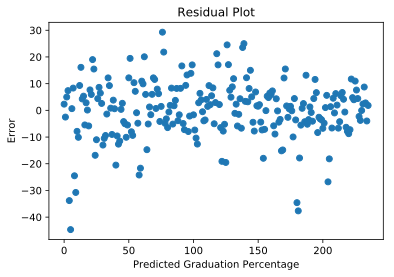

In [29]:
fit.resid.plot(style='o')
plt.title('Residual Plot')
plt.xlabel('Predicted Graduation Percentage')
plt.ylabel('Error')
plt.savefig('Presentation/residualplot.svg')

### double check with sklearn LR

In [29]:
lr = LinearRegression()
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
lr.fit(X,y)
lr.score(X,y)

0.6584069744780077

In [30]:
# run with values excised above
lr1 = LinearRegression()
X = df[['Student_Count_Total', 'Zip_Mean_Income', 'Fully_Accessible', 'Generally_Accessible',
  'Student_Count_Asian_perc',
  'Student_Count_Black_perc', 'Student_Count_English_Learners_perc',
  'Student_Count_Ethnicity_Not_Available_perc', 
  'Student_Count_Hispanic_perc', 'Student_Count_Low_Income_perc',
  'Student_Count_Native_American_perc',
  'Student_Count_Other_Ethnicity_perc', 'Student_Count_Special_Ed_perc',
  'Student_Count_White_perc', 
  'Blue', 'Brown', 'Green', 'Pink',
  'Dress_Code_dummie', 'grades_offered_count', 'charter','gender_f_bn']] 
                      
y = df['Graduation_Rate_School']

lr1.fit(X,y)
lr1.score(X,y)

print(list(zip((X), lr1.coef_)))

[('Student_Count_Total', 0.005801307031047914), ('Zip_Mean_Income', 3.9959816662847924e-05), ('Fully_Accessible', 6.818097667104697), ('Generally_Accessible', 6.02637920467217), ('Student_Count_Asian_perc', -560.1259204803372), ('Student_Count_Black_perc', -530.241535263382), ('Student_Count_English_Learners_perc', 8.983863160108687), ('Student_Count_Ethnicity_Not_Available_perc', -572.7180615162519), ('Student_Count_Hispanic_perc', -516.6584246974614), ('Student_Count_Low_Income_perc', -5.492631073919071), ('Student_Count_Native_American_perc', -1511.7768225006996), ('Student_Count_Other_Ethnicity_perc', -1.9028334463655483e-11), ('Student_Count_Special_Ed_perc', -69.72584974327279), ('Student_Count_White_perc', -541.0979267760467), ('Blue', -3.036642700494431), ('Brown', -4.707633651843664), ('Green', 6.852423598099216), ('Pink', -2.860362472295965), ('Dress_Code_dummie', 3.9597642718980564), ('grades_offered_count', -3.302771829484978), ('charter', 8.686048712898467), ('gender_f_bn'

## Sklearn Again

In [31]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [32]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [33]:
split_and_validate(X, y)


Validation R^2 score was: 0.591588977307703
Feature coefficient results: 

Student_Count_Total : 0.01
Zip_Mean_Income : 0.00
Fully_Accessible : 6.22
Generally_Accessible : 5.34
Student_Count_Asian_perc : -173.18
Student_Count_Asian_Pacific_Islander_perc : 1438.21
Student_Count_Black_perc : -131.08
Student_Count_English_Learners_perc : 19.01
Student_Count_Ethnicity_Not_Available_perc : -281.99
Student_Count_Hawaiian_Pacific_Islander_perc : 201.77
Student_Count_Hispanic_perc : -119.24
Student_Count_Low_Income_perc : -10.61
Student_Count_Multi_perc : 587.55
Student_Count_Native_American_perc : -1371.63
Student_Count_Other_Ethnicity_perc : 0.00
Student_Count_Special_Ed_perc : -77.36
Student_Count_White_perc : -150.40
Classroom_Languages_count : -1.06
Blue : -2.09
Brown : -0.32
Green : 5.03
Orange : 0.02
Pink : -2.18
Purple : -1.28
Red : -0.27
Dress_Code_dummie : 3.39
grades_offered_count : -3.01
charter : 7.00
gender_f_bn : -1.18


In [34]:
## try on excised variables
X = df[['Student_Count_Total', 'Zip_Mean_Income', 'Fully_Accessible', 'Generally_Accessible',
  'Student_Count_Asian_perc',
  'Student_Count_Black_perc', 'Student_Count_English_Learners_perc',
  'Student_Count_Ethnicity_Not_Available_perc', 
  'Student_Count_Hispanic_perc', 'Student_Count_Low_Income_perc',
  'Student_Count_Native_American_perc',
  'Student_Count_Other_Ethnicity_perc', 'Student_Count_Special_Ed_perc',
  'Student_Count_White_perc', 
  'Blue', 'Brown', 'Green', 'Pink',
  'Dress_Code_dummie', 'grades_offered_count', 'charter','gender_f_bn']] 
                      
y = df['Graduation_Rate_School']

split_and_validate(X, y)


Validation R^2 score was: 0.6038724961760626
Feature coefficient results: 

Student_Count_Total : 0.00
Zip_Mean_Income : 0.00
Fully_Accessible : 5.87
Generally_Accessible : 4.94
Student_Count_Asian_perc : -691.94
Student_Count_Black_perc : -649.67
Student_Count_English_Learners_perc : 14.21
Student_Count_Ethnicity_Not_Available_perc : -768.28
Student_Count_Hispanic_perc : -637.12
Student_Count_Low_Income_perc : -9.99
Student_Count_Native_American_perc : -1851.55
Student_Count_Other_Ethnicity_perc : -0.00
Student_Count_Special_Ed_perc : -73.78
Student_Count_White_perc : -670.31
Blue : -2.54
Brown : -0.81
Green : 4.96
Pink : -1.90
Dress_Code_dummie : 3.36
grades_offered_count : -3.05
charter : 7.54
gender_f_bn : -1.10


In [35]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X,X_test, y, Y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state =43)

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression val R^2: 0.584


### For MVP

In [38]:
## try on excised variables
X = df[['Fully_Accessible', 'Generally_Accessible',
  'Student_Count_Asian_perc',
  'Student_Count_Black_perc', 'Student_Count_English_Learners_perc',
  'Student_Count_Ethnicity_Not_Available_perc', 
  'Student_Count_Hispanic_perc', 'Student_Count_Low_Income_perc',
  'Student_Count_Native_American_perc',
  'Student_Count_Special_Ed_perc',
  'Student_Count_White_perc', 
  'Blue', 'Brown', 'Green', 'Pink',
  'Dress_Code_dummie', 'grades_offered_count', 'charter','gender_f_bn']] 
                      
y = df['Graduation_Rate_School']

split_and_validate(X, y)


Validation R^2 score was: 0.5582492389712264
Feature coefficient results: 

Fully_Accessible : 4.61
Generally_Accessible : 4.84
Student_Count_Asian_perc : -589.80
Student_Count_Black_perc : -558.46
Student_Count_English_Learners_perc : 10.13
Student_Count_Ethnicity_Not_Available_perc : -675.00
Student_Count_Hispanic_perc : -543.18
Student_Count_Low_Income_perc : -11.32
Student_Count_Native_American_perc : -1830.14
Student_Count_Special_Ed_perc : -79.24
Student_Count_White_perc : -563.77
Blue : -1.13
Brown : 1.28
Green : 4.33
Pink : -3.08
Dress_Code_dummie : 2.82
grades_offered_count : -2.63
charter : 6.92
gender_f_bn : -1.60


## Kfolds

### On all features

In [39]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y,
               cv = 5,
               scoring='r2')

array([ 0.32771866, -0.14508522,  0.29922047,  0.56551573,  0.73787255])

### These k-folds mean there is a lot of variance in my model. Need to fix

In [40]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True, random_state = 42)
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.5012003539295117


In [41]:
### Without excized features
X = df[['Student_Count_Total', 'Zip_Mean_Income', 'Fully_Accessible', 'Generally_Accessible',
  'Student_Count_Asian_perc',
  'Student_Count_Black_perc', 'Student_Count_English_Learners_perc',
  'Student_Count_Ethnicity_Not_Available_perc', 
  'Student_Count_Hispanic_perc', 'Student_Count_Low_Income_perc',
  'Student_Count_Native_American_perc',
  'Student_Count_Other_Ethnicity_perc', 'Student_Count_Special_Ed_perc',
  'Student_Count_White_perc', 
  'Blue', 'Brown', 'Green', 'Pink',
  'Dress_Code_dummie', 'grades_offered_count', 'charter','gender_f_bn']] 
                      
y = df['Graduation_Rate_School']


kf = KFold(n_splits = 5, shuffle=True, random_state = 42)
cross_val_score(lm, X, y, cv=kf, scoring='r2')
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.5296829683683507


## remove outliers

## LASSO